In [1]:
from src.functions import *

from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn.inspection import permutation_importance

# with open('data/df_boxscores.pkl', "rb") as fh:
#   df_boxscores = pickle.load(fh)

df_boxscores = pd.read_pickle('data/df_boxscores.pkl')
nfl_player_stats_by_career = pd.read_pickle('data/nfl_player_stats_by_career.pkl')
nfl_player_stats_by_season = pd.read_pickle('data/nfl_player_stats_by_season.pkl')
player_game_stats = pd.read_pickle('data/player_game_stats.pkl')
team_season_stats = pd.read_pickle('data/team_season_stats.pkl')

# Quick look at Dataset for Boxscores

In [2]:
df_boxscores.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5593 entries, ('46.5 (over)', 'Dome', 'Hubert H. Humphrey Metrodome', 'Astroturf', 'Minnesota Vikings -4.5', '2000') to ('54.5 (under)', 'Outdoors', 'Raymond James Stadium', 'Grass', 'Kansas City Chiefs -3.0', '2021')
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   attendance                    5593 non-null   int64         
 1   away_first_downs              5593 non-null   int64         
 2   away_fourth_down_attempts     5593 non-null   int64         
 3   away_fourth_down_conversions  5593 non-null   int64         
 4   away_fumbles                  5593 non-null   int64         
 5   away_fumbles_lost             5593 non-null   int64         
 6   away_interceptions            5593 non-null   int64         
 7   away_net_pass_yards           5593 non-null   int64         
 8   away_pass_attempts            5593

In [3]:
df_boxscores.describe()

,attendance,away_first_downs,away_fourth_down_attempts,away_fourth_down_conversions,away_fumbles,away_fumbles_lost,away_interceptions,away_net_pass_yards,away_pass_attempts,away_pass_completions,away_pass_touchdowns,away_pass_yards,away_penalties,away_points,away_rush_attempts,away_rush_touchdowns,away_rush_yards,away_third_down_attempts,away_third_down_conversions,away_times_sacked,away_total_yards,away_turnovers,away_yards_from_penalties,away_yards_lost_from_sacks,home_first_downs,home_fourth_down_attempts,home_fourth_down_conversions,home_fumbles,home_fumbles_lost,home_interceptions,home_net_pass_yards,home_pass_attempts,home_pass_completions,home_pass_touchdowns,home_pass_yards,home_penalties,home_points,home_rush_attempts,home_rush_touchdowns,home_rush_yards,home_third_down_attempts,home_third_down_conversions,home_times_sacked,home_total_yards,home_turnovers,home_yards_from_penalties,home_yards_lost_from_sacks,over_under_total,total_minus_over,total_points,wind
count,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.00000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.00000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.00000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000
mean,64612.521724,18.835866,1.017701,0.494189,1.395852,0.65725,0.977472,219.531200,33.983730,20.637404,1.387985,234.899875,6.508672,20.915072,26.674951,0.74772,110.027892,13.331486,5.062042,2.366172,329.552655,1.634722,54.436081,15.366172,19.803326,0.935097,0.465224,1.410692,0.659753,0.921151,225.795637,33.682639,20.793134,1.50438,240.114786,6.128017,23.225639,27.738065,0.906133,117.655641,13.198462,5.226176,2.224566,343.450206,1.580905,51.257286,14.319149,43.473628,0.667084,44.140712,5.608618
std,16087.841668,5.106122,1.069579,0.737565,1.233299,0.82086,1.039901,78.924545,8.505821,6.110052,1.110497,77.278543,2.837890,10.130679,7.920328,0.87884,50.868761,2.507051,2.258250,1.742965,86.793451,1.356035,27.168734,12.646778,4.991654,1.033543,0.715590,1.244849,0.813591,1.008745,78.030314,8.511833,6.058101,1.16872,76.641815,2.701148,10.347877,7.904736,0.960385,52.407765,2.579831,2.247431,1.699425,84.233779,1.343508,26.006048,12.206639,5.005431,13.475675,14.249515,5.962212
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-9.000000,6.000000,1.000000,0.000000,7.000000,0.000000,0.000000,6.000000,0.00000,1.000000,5.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,7.000000,1.000000,0.00000,13.000000,0.000000,0.000000,5.000000,0.000000,3.000000,4.000000,0.000000,0.000000,77.000000,0.000000,0.000000,0.000000,30.000000,-39.500000,3.000000,0.000000
25%,62377.000000,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,163.000000,28.000000,16.000000,1.000000,180.000000,4.000000,14.000000,21.000000,0.00000,73.000000,12.000000,3.000000,1.000000,269.000000,1.000000,35.000000,6.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,171.000000,28.000000,16.000000,1.00000,186.000000,4.000000,16.000000,22.000000,0.000000,81.000000,11.000000,4.000000,1.000000,285.000000,1.000000,32.000000,5.000000,40.000000,-8.500000,34.000000,0.000000
50%,67840.000000,19.000000,1.000000,0.000000,1.000000,0.00000,1.000000,216.000000,34.000000,20.000000,1.000000,231.000000,6.000000,20.000000,26.000000,1.00000,103.000000,13.000000,5.000000,2.000000,329.000000,1.000000,51.000000,13.000000,20.000000,1.000000,0.000000,1.000000,0.000000,1.000000,221.000000,33.000000,20.000000,1.00000,235.000000,6.000000,23.000000,27.000000,1.000000,111.000000,13.000000,5.000000,2.000000,343.000000,1.000000,48.000000,12.000000,43

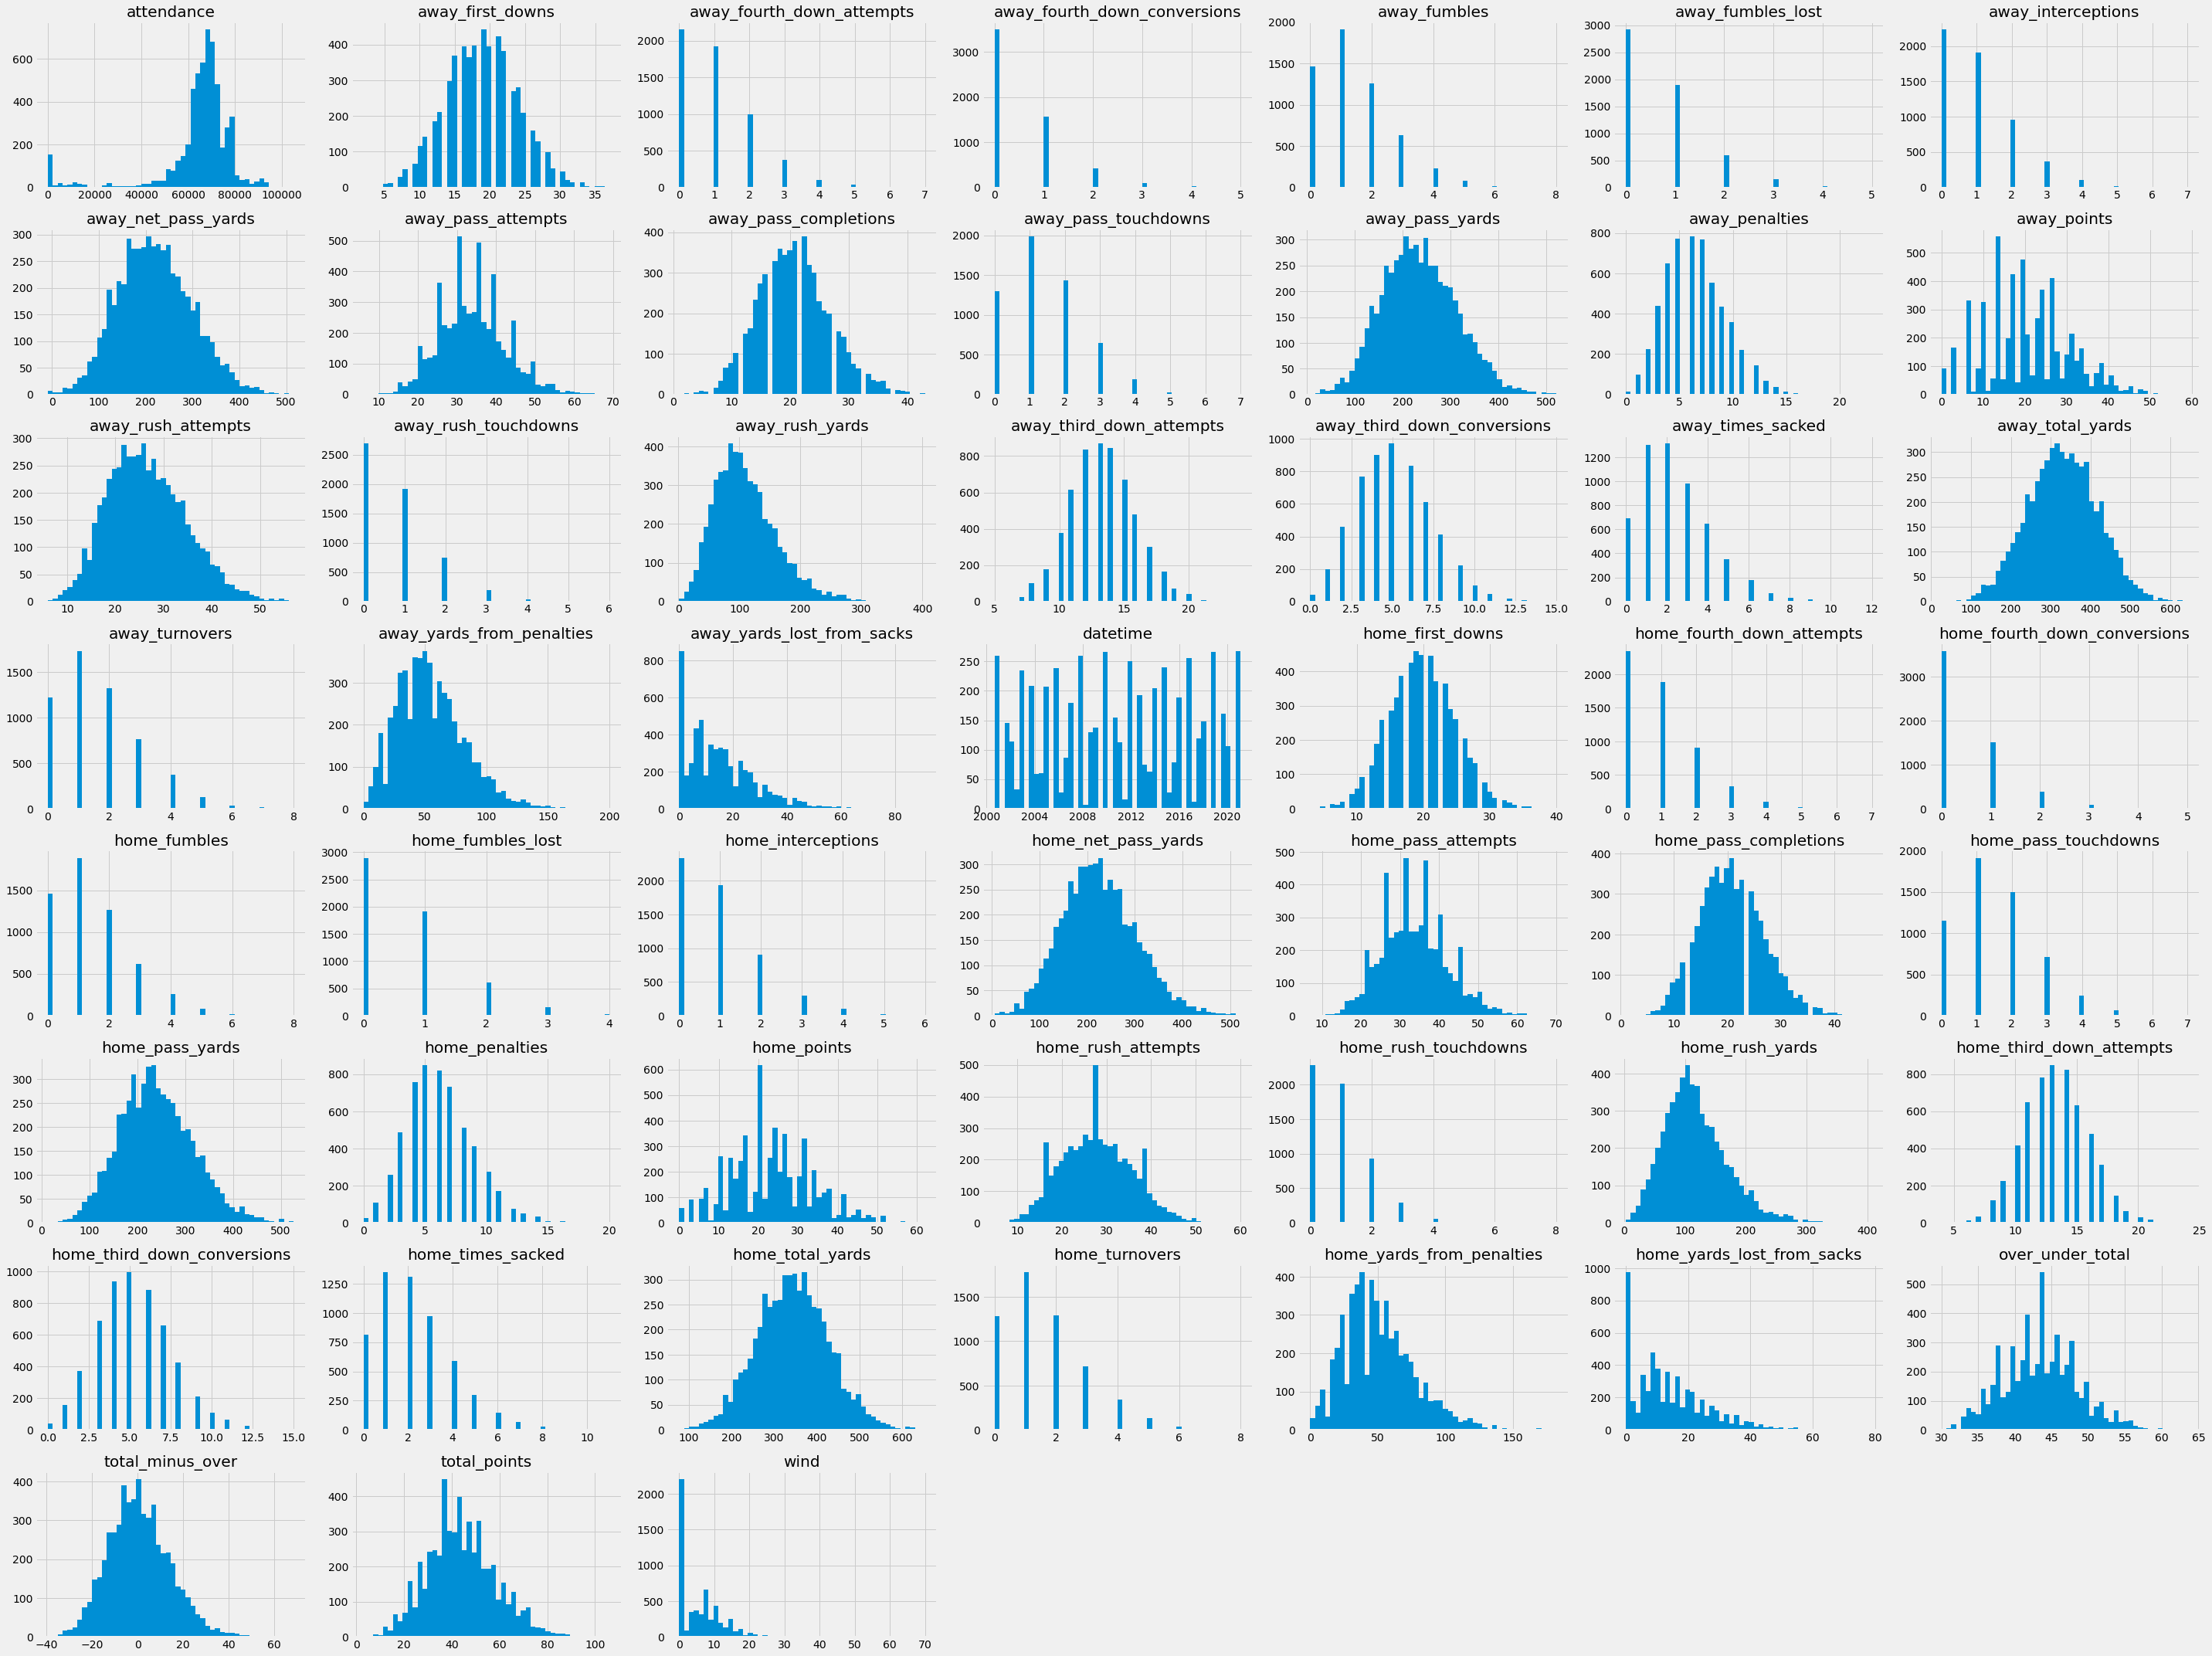

In [6]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

df_boxscores.hist(bins=50, figsize=(40,30))
plt.tight_layout()
plt.show()

In [8]:
train_set, test_set = train_test_split(df_nums, test_size=0.2)

In [9]:
train_nums_df = df_nums.drop('total_points', axis=1)
train_labels = df_nums['total_points'].copy()